# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Brandt Green

EID: bwg537

Name: Bret Jaco

EID: bcj646

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:

Gradient Boosting is an ensemble method that primarily consists of three parts. The first element is a loss function to be minimized. This function depends on the problem being solved,
with squared error typically being used for regression problems and logarithmic loss often being used for classification problems. The next component uses short decision trees as "weak learners" which can be added together to improve the upon residuals in the predictions. These week learners are restricted by the number of splits or leaf nodes so as not to overfit the data. Lastly, the trees are added one at a time using a gradient descent procedure that minimizes the loss function. The existing trees are not changed and the procedure stops when a fixed number of trees are added or the loss reaches an acceptable level.


AdaBoost differs from Gradient Boosting in that it focuses training on misclassified observations as opposed to minimizing a loss function. It does this by increasing weights on observations that are difficult to classify. AdaBoost also uses decision trees with only one split, known as "stumps", whereas Gradient Boosting uses trees with typically 4-8 levels. Because AdaBoost focuses on difficult to classify observations, it is sensitive to outliers and not as robust as Gradient Boosting. 

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

# Questions
* Should the SVC data be transformed befpre fitting?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

### Initial Data Visualization

<AxesSubplot:xlabel='x_1', ylabel='x_2'>

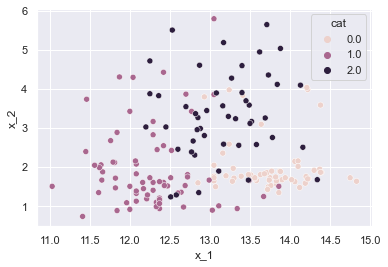

In [21]:
df = pd.DataFrame(np.concatenate([X, y.reshape(len(y),-1)],axis=1))
df.columns = ['x_1','x_2','cat']
sns.scatterplot(data=df,x='x_1',y='x_2',hue='cat')

In [22]:
def plot_model(X, y, svc, kernel='linear'):
  """  Input: 
  - X: data features 
  - y: the labels
  - svc: the trained svm.SVC model
  - kernel: specified kernel type, default value is 'linear'
   """

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

In [23]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
  svc.fit(X,y)

  return svc

## a)

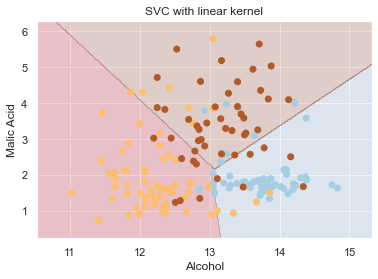

In [24]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## b)

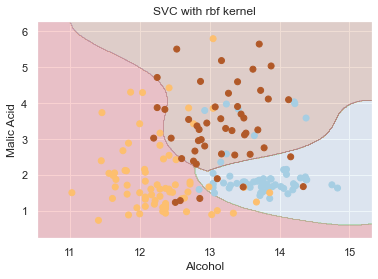

In [25]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

How intriguing, those firm, line like boundaries that we observered before are no longer as rigid. It appears rbf allows the boundary separators to adopt a curvier, wiggly separator.

## c)

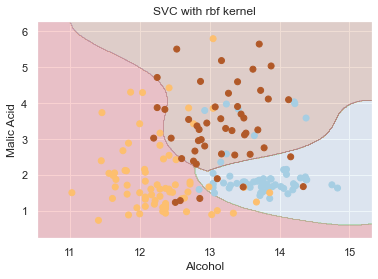

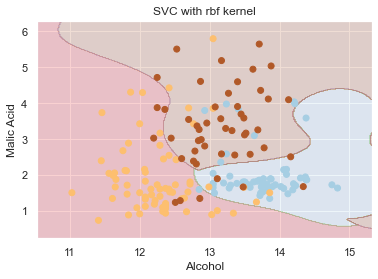

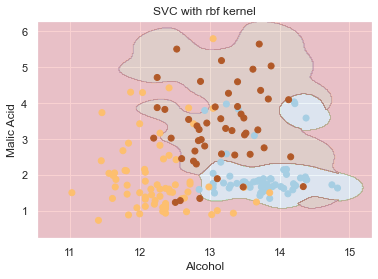

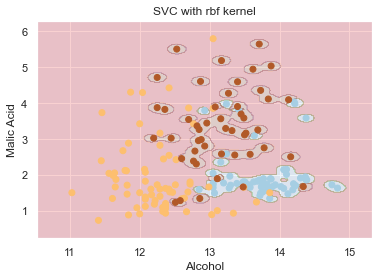

In [26]:
gamma_values = [0.5, 1, 10, 100]

for gamma in gamma_values:
    plot_model(X, y, train_model(X, y, kernel='rbf', C=1, gamma=gamma), kernel='rbf')

Well that is quite fascinating. As the gamma grows larger, it appears the flexibility of our separators increase, where each successful model curves more on more. The most extreme model with a gamma of 100 is clearly overfitting but it is pretty cool to see how the model successfully hones in on each data point.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## a)

In [28]:
tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train,y_train)

tree_predictions = tree_model.predict(X_test)
tree_probs = tree_model.predict_proba(X_test)[:,1]

tree_accuracy = accuracy_score(y_test,tree_predictions)
tree_roc_auc = roc_auc_score(y_test,tree_probs)

print(f'For the decision tree, the accuracy score = {tree_accuracy} and the ROC-AUC score = {tree_roc_auc}')

For the decision tree, the accuracy score = 0.9098090849242922 and the ROC-AUC score = 0.9040453749567611


In [29]:
logistic_model = LogisticRegression(random_state=10,solver='newton-cg')
logistic_model.fit(X_train,y_train)

logistic_predictions = logistic_model.predict(X_test)
logistic_probs = logistic_model.predict_proba(X_test)[:,1]

logistic_accuracy = accuracy_score(y_test,logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test,logistic_probs)

print(f'For the logistic regression model, the accuracy score = {logistic_accuracy} and the ROC-AUC score = {logistic_roc_auc}')

For the logistic regression model, the accuracy score = 0.9315339038841343 and the ROC-AUC score = 0.9734682742610166


## b)

In [30]:
tree_bag_model = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=10)

tree_bag_model.fit(X_train,y_train)

tree_bag_predictions = tree_bag_model.predict(X_test)
tree_bag_probs = tree_bag_model.predict_proba(X_test)[:,1]

tree_bag_accuracy = accuracy_score(y_test,tree_bag_predictions)
tree_bag_roc_auc = roc_auc_score(y_test,tree_bag_probs)

print(f'For the bagged trees model, the accuracy score = {tree_bag_accuracy} and the ROC-AUC score = {tree_bag_roc_auc}')

For the bagged trees model, the accuracy score = 0.9368005266622779 and the ROC-AUC score = 0.9796839729119637


In [31]:
logistic_bag_model = BaggingClassifier(LogisticRegression(solver='newton-cg'),n_estimators=50,random_state=10)

logistic_bag_model.fit(X_train,y_train)

logistic_bag_predictions = logistic_bag_model.predict(X_test)
logistic_bag_probs = logistic_bag_model.predict_proba(X_test)[:,1]

logistic_bag_accuracy = accuracy_score(y_test,logistic_bag_predictions)
logistic_bag_roc_auc = roc_auc_score(y_test,logistic_bag_probs)

print(f'For the logistic regression bagged model, the accuracy score = {logistic_bag_accuracy} and the ROC-AUC score = {logistic_bag_roc_auc}')

For the logistic regression bagged model, the accuracy score = 0.934167215273206 and the ROC-AUC score = 0.97552769248874


For the decision trees, the results appear to improve when using bagging, but for the logistic model there is essentially no improvement from bagging. Perhaps there is not enough diversity in each of the logistic models to benefit from the ensemble approach.

## c)

In [32]:
rf_grid = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}

rf_models = GridSearchCV(RandomForestClassifier(),param_grid=rf_grid)
rf_models.fit(X,y)
rf_models.best_params_

{'criterion': 'entropy', 'n_estimators': 500, 'random_state': 42}

In [33]:
rf_model = RandomForestClassifier(criterion=rf_models.best_params_['criterion'],n_estimators=rf_models.best_params_['n_estimators'],random_state=rf_models.best_params_['random_state']).fit(X,y)

rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print(f'For the Random Forest model, the accuracy score = {rf_accuracy} and the ROC-AUC score = {rf_roc_auc}')

For the Random Forest model, the accuracy score = 0.9993416721527321 and the ROC-AUC score = 1.0


## d)

Create the grids to be used in grid search:

In [34]:
gradient_grid = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}
ada_grid = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}

Caution!! Below cell takes like 20 minutesish to run.

In [35]:
gradient_models = GridSearchCV(GradientBoostingClassifier(),param_grid=gradient_grid)
gradient_models.fit(X,y)
gradient_models.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 1.0}

In [36]:
gb_model = GradientBoostingClassifier(**gradient_models.best_params_).fit(X,y)

gb_accuracy = accuracy_score(y_test, gb_model.predict(X_test))
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])

print(f'For the Gradient Boosting model, the accuracy score = {gb_accuracy} and the ROC-AUC score = {gb_roc_auc}')

For the Gradient Boosting model, the accuracy score = 0.9927583936800527 and the ROC-AUC score = 0.9994276422068404


In [37]:
ada_models = GridSearchCV(AdaBoostClassifier(),param_grid=ada_grid)
ada_models.fit(X,y)
ada_models.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [38]:
ada_model = AdaBoostClassifier(**ada_models.best_params_).fit(X,y)

ada_accuracy = accuracy_score(y_test, ada_model.predict(X_test))
ada_roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:,1])

print(f'For the Ada Boosting model, the accuracy score = {ada_accuracy} and the ROC-AUC score = {ada_roc_auc}')

For the Ada Boosting model, the accuracy score = 0.9637919684002634 and the ROC-AUC score = 0.9939438839736251


## e)

Create dataframe to hold the model evaluation scores

In [39]:
estimator_choices = [10,100,500]
metrics = ['accuracy','roc_auc']
models = ['Random_Forest','Gradient_Boosting','Ada_Boost']

df_metrics = pd.DataFrame(index=estimator_choices,columns=pd.MultiIndex.from_product([metrics,models]))
df_metrics

accuracy                                   roc_auc                    \
    Random_Forest Gradient_Boosting Ada_Boost Random_Forest Gradient_Boosting   
10            NaN               NaN       NaN           NaN               NaN   
100           NaN               NaN       NaN           NaN               NaN   
500           NaN               NaN       NaN           NaN               NaN   

               
    Ada_Boost  
10        NaN  
100       NaN  
500       NaN

In [40]:
# Creat the models with best params
rf_model = RandomForestClassifier(**rf_models.best_params_)
gb_model = GradientBoostingClassifier(**gradient_models.best_params_)
ada_model = AdaBoostClassifier(**ada_models.best_params_)


for num_estimators in estimator_choices:
    rf_model.n_estimators = num_estimators
    rf_model.fit(X,y)

    gb_model.n_estimators = num_estimators
    gb_model.fit(X,y)

    ada_model.n_estimators = num_estimators
    ada_model.fit(X,y)
    
    df_metrics.loc[num_estimators,('accuracy','Random_Forest')] = accuracy_score(y_test, rf_model.predict(X_test))
    df_metrics.loc[num_estimators,('accuracy','Gradient_Boosting')] = accuracy_score(y_test, gb_model.predict(X_test))
    df_metrics.loc[num_estimators,('accuracy','Ada_Boost')] = accuracy_score(y_test, ada_model.predict(X_test))

    df_metrics.loc[num_estimators,('roc_auc','Random_Forest')] = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
    df_metrics.loc[num_estimators,('roc_auc','Gradient_Boosting')] = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])
    df_metrics.loc[num_estimators,('roc_auc','Ada_Boost')] = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:,1])

In [41]:
df_metrics

accuracy                                   roc_auc                    \
    Random_Forest Gradient_Boosting Ada_Boost Random_Forest Gradient_Boosting   
10       0.994075          0.917709  0.867676      0.999903           0.95683   
100      0.998683          0.970375  0.945359           1.0          0.993922   
500      0.999342          0.992758  0.963792           1.0          0.999428   

               
    Ada_Boost  
10    0.93661  
100  0.986547  
500  0.993944

Text(0, 0.5, 'Accuracy')

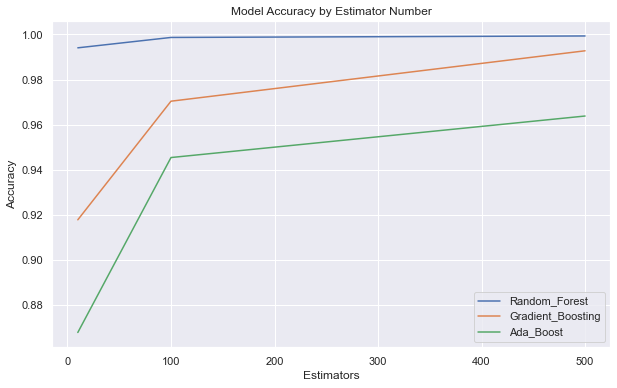

In [42]:
df_metrics['accuracy'].plot(figsize=(10,6))
plt.title('Model Accuracy by Estimator Number')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

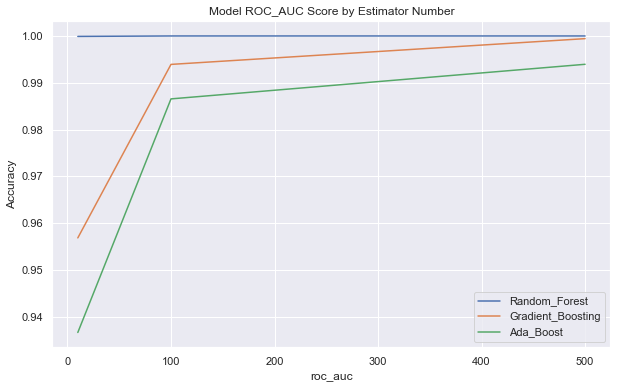

In [44]:
df_metrics['roc_auc'].plot(figsize=(10,6))
plt.title('Model ROC_AUC Score by Estimator Number')
plt.xlabel('roc_auc')
plt.ylabel('Accuracy')